In [1]:
from __future__ import division, print_function
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
from fitlab.resman import RESMAN
from plotter import Plotter
from tools.tools import load_config
%matplotlib inline

In [2]:
rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})

conf = load_config("../fitlab/inputs/upol_hermes.py")
conf["resman"] = RESMAN(conf)
conf["resman"].get_residuals(conf["parman"].par)

x_bins = [0.023, 0.085, 0.6]
q2_bins = [1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 3.0, 5.0, 15.0]

raw = pd.read_excel('../database/sidis/expdata/1004.xlsx')

data = pd.concat(pd.DataFrame(d)
                 for d in conf["resman"].sidisres.tabs.values())

data = data[(data["hadron"] == "pi+") &
            (data["target"] == "deuteron")]

z_bin_edges = [0.1, 0.2, 0.3, 0.4, 0.6, 0.8]
z_bins = list(zip(z_bin_edges[::2], z_bin_edges[1::2]))

def z_func(z):
    for k, (zmin, zmax) in enumerate(z_bins):
        if (z <= zmax) and ((zmin < z) or (k == 0 and zmin <= z)):
            return k

z_ids = tuple(range(5))

z_labs = {
    0: r"$z \in \left[ 0.1, 0.2 \right]$",
    1: r"$z \in \left( 0.2, 0.3 \right]$",
    2: r"$z \in \left( 0.3, 0.4 \right]$",
    3: r"$z \in \left( 0.4, 0.6 \right]$",
    4: r"$z \in \left( 0.6, 0.8 \right]$"
}

raw["qT"] = raw["pT"] / raw["z"]
data["qT"] = data["pT"] / data["z"]

col_lab = "pT"
sub_xlabel = r"$p_T$ (GeV)"

big_xlabel = "$x$"
big_ylabel = "$Q^2$"

title = "HERMES"

sub_ylabel = r"$M_{D}^{\pi^+}$"

fig_kw = {"figsize": (13, 13)}

plotter = Plotter(raw=raw,
                  data=data,
                  col_lab=col_lab,
                  q2_bins=q2_bins,
                  x_bins=x_bins,
                  z_func=z_func,
                  z_ids=z_ids,
                  z_labs=z_labs,
                  sub_xlabel=sub_xlabel,
                  sub_ylabel=sub_ylabel,
                  big_xlabel=big_xlabel,
                  big_ylabel=big_ylabel,
                  title=title,
                  fig_kw=fig_kw
                  )

plotter.raw_plot_kw["alpha"] = 0.4
plotter.raw_plot_kw["markersize"] = 2
plotter.raw_plot_kw["linewidth"] = 2

plotter.data_plot_kw["alpha"] = 1.0
plotter.data_plot_kw["markersize"] = 2.4
plotter.data_plot_kw["linewidth"] = 2
plotter.data_plot_kw["markeredgecolor"] = (0.8392156862745098,
                                           0.15294117647058825,
                                           0.1568627450980392)  # To increase visibility
plotter.data_plot_kw["markeredgewidth"] = 0.16

# Should HERMES errors be making use of "systab_u" for errors?
# Error labeling seems inconsistent.

loading sidis data sets 1005

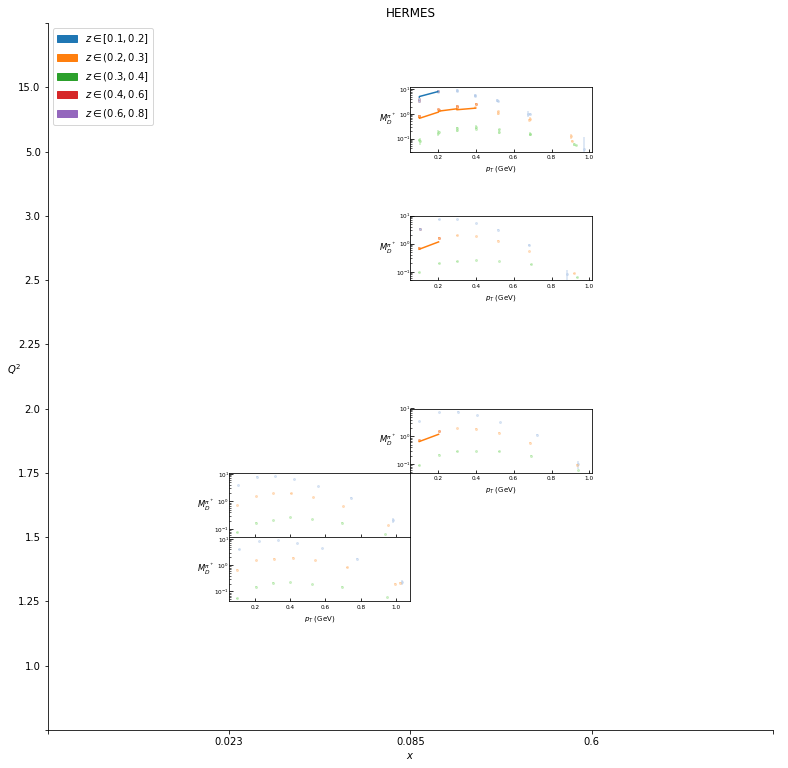

In [3]:
plotter.plot()

In [4]:
df = pd.DataFrame()

for i, j in sorted(plotter.raw_slices, key=lambda x: (-x[0], x[1])):
    for k in plotter.z_ids:
        raw_slice = plotter.raw_slices[i, j]
        data_slice = plotter.data_slices[i, j]
        df = df.append({"i": i,
                        "j": j,
                        "k(z)": k,
                        "raw": len(raw_slice[raw_slice["k(z)"] == k]),
                        "data": len(data_slice[data_slice["k(z)"] == k])
                        }, ignore_index=True)

df = df[df.columns.tolist()[1:] + [df.columns[0]]]

print("Total raw points:", len(plotter.raw["x"]))
print("Total data points:", len(plotter.data["x"]))

df

Total raw points: 335
Total data points: 64


,i,j,k(z),raw,data
0,8.0,1.0,0.0,7.0,0.0
1,8.0,1.0,1.0,8.0,0.0
2,8.0,1.0,2.0,7.0,0.0
3,8.0,1.0,3.0,0.0,0.0
4,8.0,1.0,4.0,0.0,0.0
5,7.0,1.0,0.0,7.0,0.0
6,7.0,1.0,1.0,7.0,0.0
7,7.0,1.0,2.0,7.0,0.0
8,7.0,1.0,3.0,0.0,0.0
9,7.0,1.0,4.0,0.0,0.0


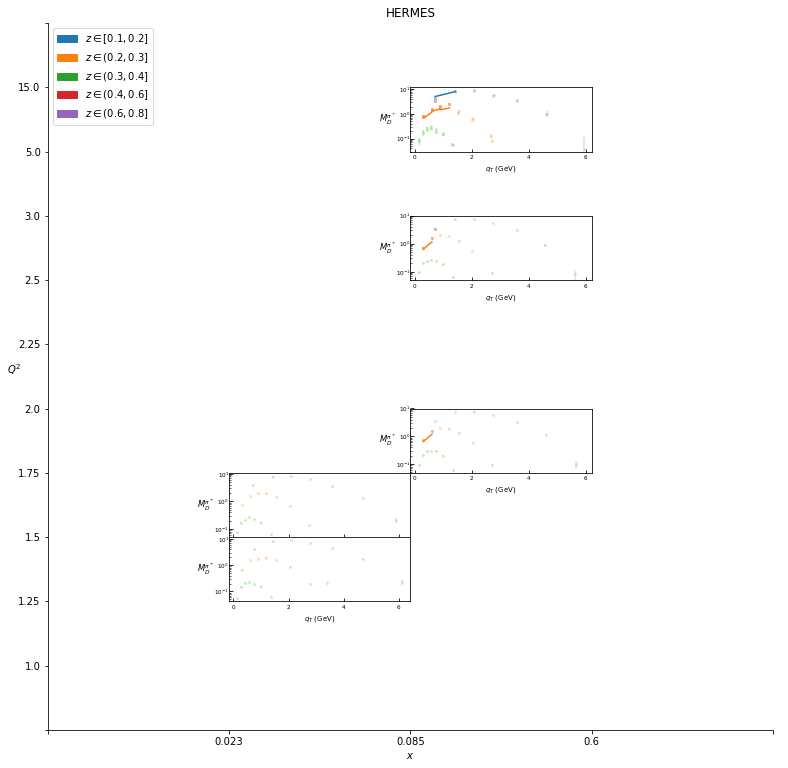

In [5]:
plotter.col_lab = "qT"
plotter.sub_xlabel = r"$q_T$ (GeV)"

plotter.plot()